# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [192]:
%matplotlib inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [193]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [194]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

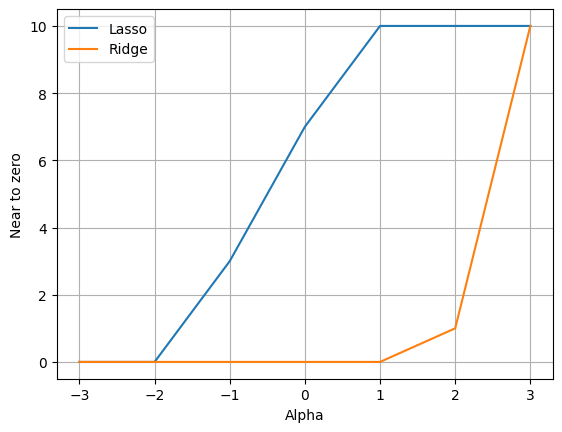

In [195]:
xs, ls, rs = [], [], []
small = 1

start, stop, step = 10 ** (-3), 10 ** 3, 10

alpha, ind = start, -3

while alpha <= 10 ** 3:
    lasso = Lasso(alpha)
    ridge = Ridge(alpha)

    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    lc = list(lasso.coef_)
    rc = list(ridge.coef_)

    cnt_l, cnt_r = 0, 0
    for ri, li in zip(rc, lc):
        if abs(ri) < small: cnt_r += 1
        if abs(li) < small: cnt_l += 1
    xs.append(ind)
    ls.append(cnt_l)
    rs.append(cnt_r) 

    ind += 1

    alpha *= step

plt.plot(xs, ls, label='Lasso')
plt.plot(xs, rs, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Near to zero')
plt.grid()
plt.legend()

plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calc_rmse(model: Ridge, X: np.ndarray, y: np.ndarray):
    return mean_squared_error(y, model.predict(X), squared=False)

def calc_mse(model: Ridge, X: np.ndarray, y: np.ndarray):
    return mean_squared_error(y, model.predict(X))

def calc_mae(model: Ridge, X: np.ndarray, y: np.ndarray):
    return mean_absolute_error(y, model.predict(X))

def calc_r2(model: Ridge, X: np.ndarray, y: np.ndarray):
    return r2_score(y, model.predict(X))

In [206]:
model = Ridge()
model.fit(X_train, y_train)

print(f'MSE: {calc_mse(model, X_test, y_test)}\nMAE: {calc_mae(model, X_test, y_test)}\nRMSE: {calc_rmse(model, X_test, y_test)}\nR^2: {calc_r2(model, X_test, y_test)}')

MSE: 3435.9181189443952
MAE: 49.663236111785444
RMSE: 58.61670511845915
R^2: 0.35302401185562804


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

/tmp/ipykernel_16709/3525767200.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


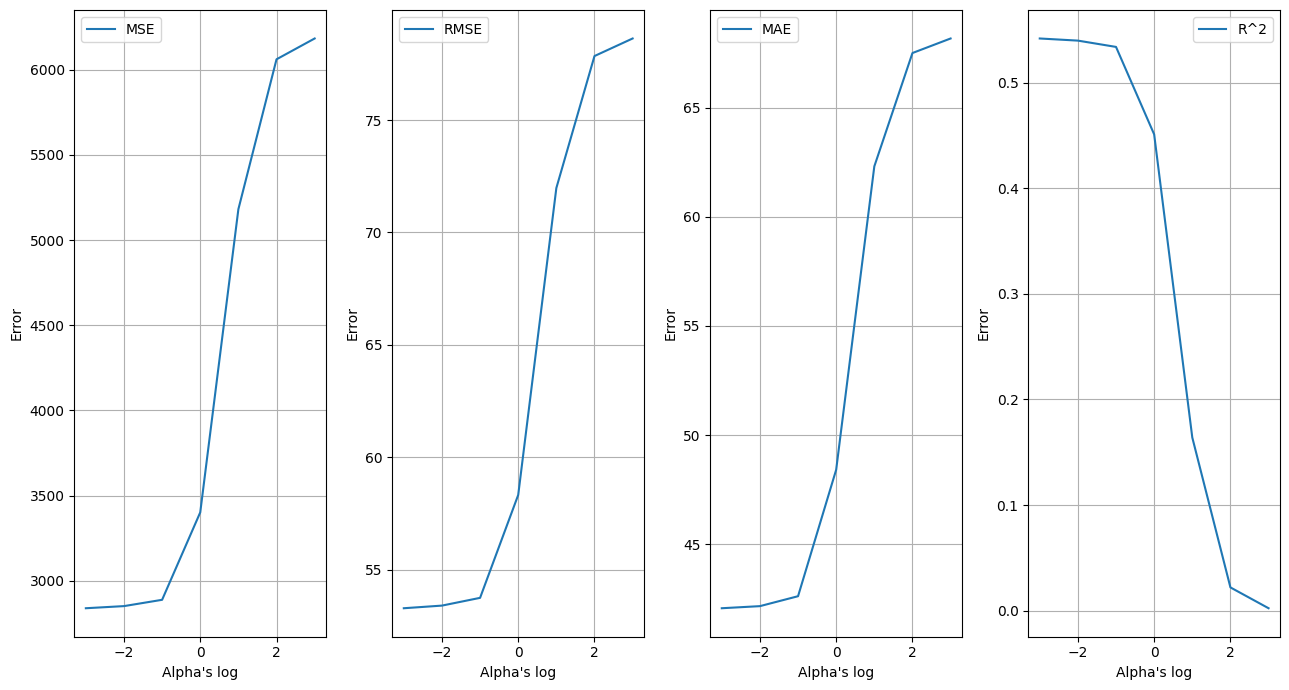

In [198]:
def to_plot(plot_model, xs, ys, label, xname, yname):
    plot_model.plot(xs, ys, label=label)
    plot_model.set_xlabel(xname)
    plot_model.set_ylabel(yname)
    plot_model.legend()
    plot_model.grid()

r2s, maes, mses, rmses, inds = ([] for _ in range(5))

alpha, ind = start, -3
while alpha <= stop:

    model = Ridge(alpha)
    model.fit(X_train, y_train)

    inds.append(ind)
    r2s.append(calc_r2(model, X_train, y_train))
    mses.append(calc_mse(model, X_train, y_train))
    maes.append(calc_mae(model, X_train, y_train))
    rmses.append(calc_rmse(model, X_train, y_train))

    ind += 1
    alpha *= step

f, ax = plt.subplots(1, 4, figsize=(13, 7))

to_plot(ax[0], inds, mses, 'MSE', "Alpha's log", "Error")
to_plot(ax[1], inds, rmses, 'RMSE', "Alpha's log", "Error")
to_plot(ax[2], inds, maes, 'MAE', "Alpha's log", "Error")
to_plot(ax[3], inds, r2s, 'R^2', "Alpha's log", "Error")

f.tight_layout()
f.show()


In [199]:
# оптимальным является минимальное alpha = 10 ** (-3)

alpha = start

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

print(f'MSE: {calc_mse(model, X_test, y_test)}\nMAE: {calc_mae(model, X_test, y_test)}\nRMSE: {calc_rmse(model, X_test, y_test)}\nR^2: {calc_r2(model, X_test, y_test)}')

MSE: 3120.0664687441895
MAE: 47.15542977613068
RMSE: 55.857555162611526
R^2: 0.41249819791629294


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

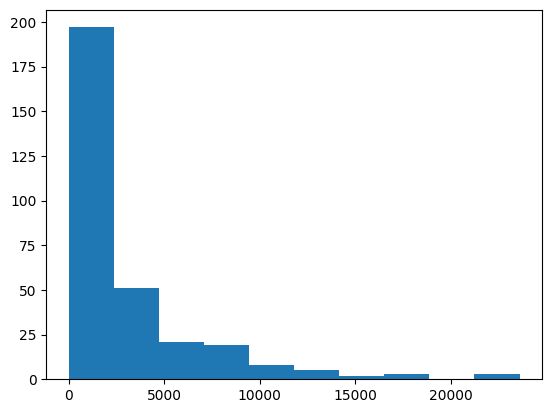

In [200]:
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

err = (y_pred - y_train) ** 2

plt.hist(err)

plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [201]:
percentile = np.percentile(err, q=80)

X_train = X_train[err < percentile]
y_train = y_train[err < percentile]

err = err[err < percentile]

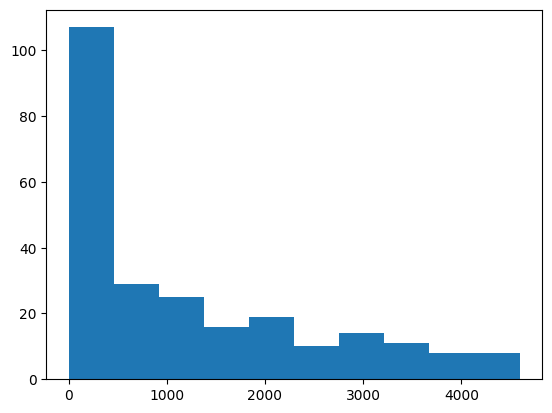

In [202]:
plt.hist(err)

plt.show()

In [203]:
alpha = start

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

print(f'MSE: {calc_mse(model, X_test, y_test)}\nMAE: {calc_mae(model, X_test, y_test)}\nRMSE: {calc_rmse(model, X_test, y_test)}\nR^2: {calc_r2(model, X_test, y_test)}')

MSE: 3068.1774783094925
MAE: 46.19412902462043
RMSE: 55.39113176591982
R^2: 0.4222687831567281


__Задание 3.__ Отчёт

**(2 балла)**

Итак, давайте по пунктам разберём, что мы делали в этом ДЗ:

1. Построили график близких к нулю элементов в зависимости от коэффициента регуляризации $\alpha$. Получили, что как в случае `Ridge`, так и в случае `Lasso` кол-во близких к нулю коэффициентов возрастает с ростом $\alpha$. Это объяснимо: чем больше $\alpha$, тем сильнее величина весов модели влияет на функцию потерь (увеличивает её), а значит тем активнее модель будет стараться эти веса минимизировать (т.е. кол-во маленьких элементов будет возрастать).

2. Подобрали оптимальный коэффициент регуляризации в зависимости от значений различных функций потерь на обучающей выборке. Оказалось, что все ФП при увеличении $\alpha$ ухудшают свои показания (_RMSE_, _MSE_, _MAE_ возрастают, а _R^2_ убывает). При этом значения ФП при переходе от дефолтного значения $\alpha$ ($=1$ по умолчанию в _sklearn_) к оптимальному $\left(=10^{-3}\right)$ изменились незначительно. Вероятно, это связано с тем что _sklearn_ по умолчанию подбирает близкий к оптимальному коэффициент регуляризации.

3. Постарались улучшить предсказания модели на тестовой выборке путём избавления от выбросов в обучающей. Было откинуто $20\%$ верхних значений ошибок (приблизительно $\geq 6000$). В результате предсказания модели улучшились, но не слишком значительно (хотя без нормализации факторов говорить о значительности того или иного изменения сложно). Возможно, из-за выбросов в тестовой выборке.

